<a href="https://colab.research.google.com/github/zalfajhra/2025_VK_TI2C/blob/main/Jobsheet_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


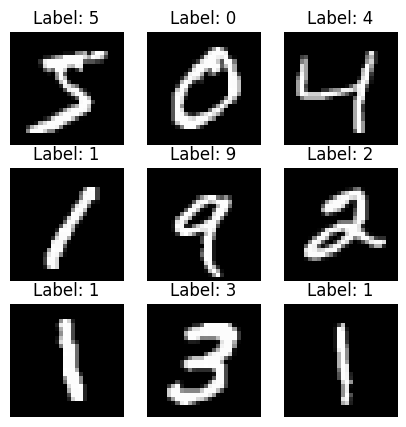

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

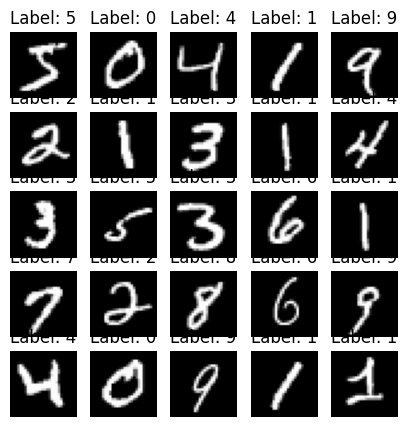

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subnet karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subnet karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


# Praktikum D3: Membangun CNN Dasar

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8963 - loss: 0.3598 - val_accuracy: 0.9812 - val_loss: 0.0746
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9802 - loss: 0.0666 - val_accuracy: 0.9825 - val_loss: 0.0571
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9875 - loss: 0.0411 - val_accuracy: 0.9853 - val_loss: 0.0498
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9855 - val_loss: 0.0577
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9938 - loss: 0.0195 - val_accuracy: 0.9832 - val_loss: 0.0586


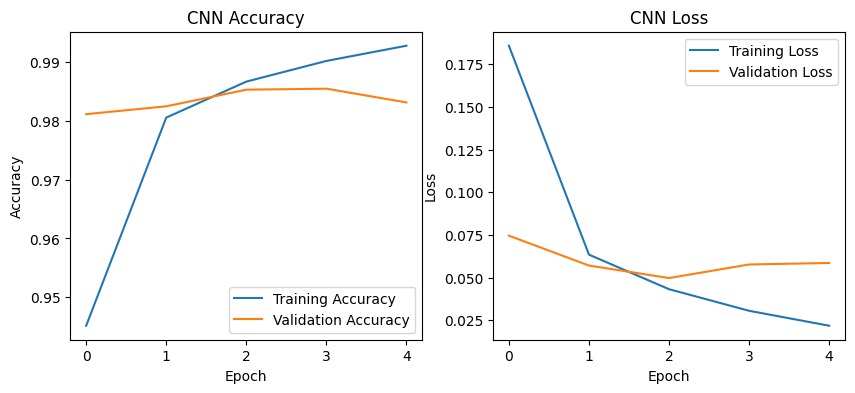

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Flatten(), layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.8888 - loss: 0.3701 - val_accuracy: 0.9802 - val_loss: 0.0716
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9806 - loss: 0.0628 - val_accuracy: 0.9862 - val_loss: 0.0452
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9876 - loss: 0.0390 - val_accuracy: 0.9863 - val_loss: 0.0452
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9905 - loss: 0.0291 - val_accuracy: 0.9883 - val_loss: 0.0455
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9895 - val_loss: 0.0381


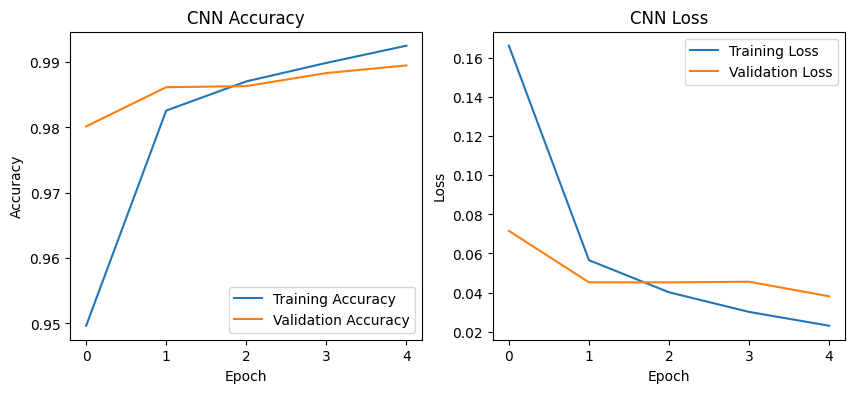

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
    layers.Flatten(), layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum 4: Eksperimen dengan Dataset Lebih Komplek(CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - accuracy: 0.3807 - loss: 1.7151 - val_accuracy: 0.5690 - val_loss: 1.2083
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.5838 - loss: 1.1770 - val_accuracy: 0.6106 - val_loss: 1.0924
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6460 - loss: 1.0161 - val_accuracy: 0.6716 - val_loss: 0.9546
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.6794 - loss: 0.9189 - val_accuracy: 0.6648 - val_loss: 0.9400
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.7058 - loss: 0.8404 - val_accuracy: 0.6948 - val_loss: 0.8855
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.7242 - loss: 0.7839 - val_accuracy: 0.6802 - val_loss: 0.9112
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7504 - loss: 0.7173 - val_accuracy: 0.6978 - val_loss: 0.9087
Epoch 8/10
1407/1407 ━━

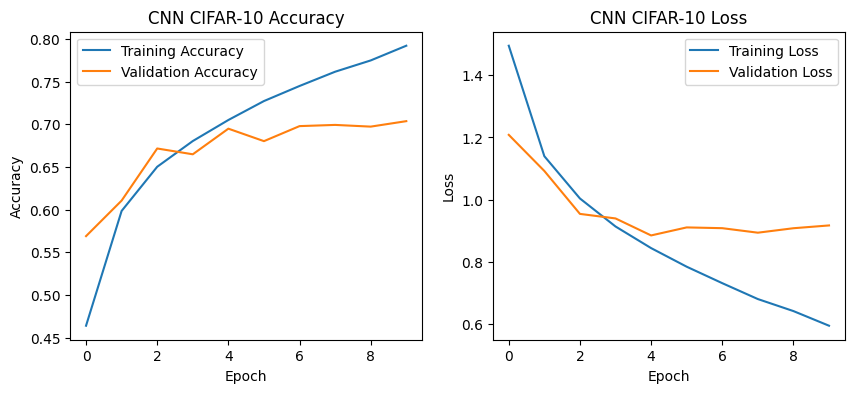

In [7]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 46ms/step - accuracy: 0.2470 - loss: 2.0015 - val_accuracy: 0.4924 - val_loss: 1.4159
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.4269 - loss: 1.5556 - val_accuracy: 0.5538 - val_loss: 1.2678
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.4874 - loss: 1.4082 - val_accuracy: 0.6070 - val_loss: 1.1562
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.5277 - loss: 1.3130 - val_accuracy: 0.5958 - val_loss: 1.1265
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.5579 - loss: 1.2400 - val_accuracy: 0.6470 - val_loss: 1.0322
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.5723 - loss: 1.1976 - val_accuracy: 0.6528 - val_loss: 1.0053
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.5931 - loss: 1.1357 - val_accuracy: 0.6554 - val_loss: 0.9807
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.6101 -

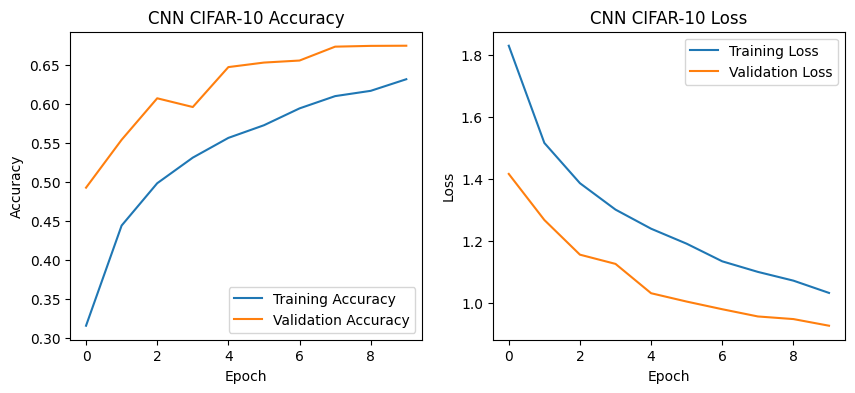

In [8]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D5: Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 708s 502ms/step - accuracy: 0.4562 - loss: 1.5478 - val_accuracy: 0.5752 - val_loss: 1.2122
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 741s 502ms/step - accuracy: 0.5764 - loss: 1.2101 - val_accuracy: 0.5808 - val_loss: 1.1838
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 751s 508ms/step - accuracy: 0.6046 - loss: 1.1395 - val_accuracy: 0.6076 - val_loss: 1.1306
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 740s 507ms/step - accuracy: 0.6113 - loss: 1.1097 - val_accuracy: 0.6058 - val_loss: 1.1163
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 729s 497ms/step - accuracy: 0.6262 - loss: 1.0700 - val_accuracy: 0.6026 - val_loss: 1.1183


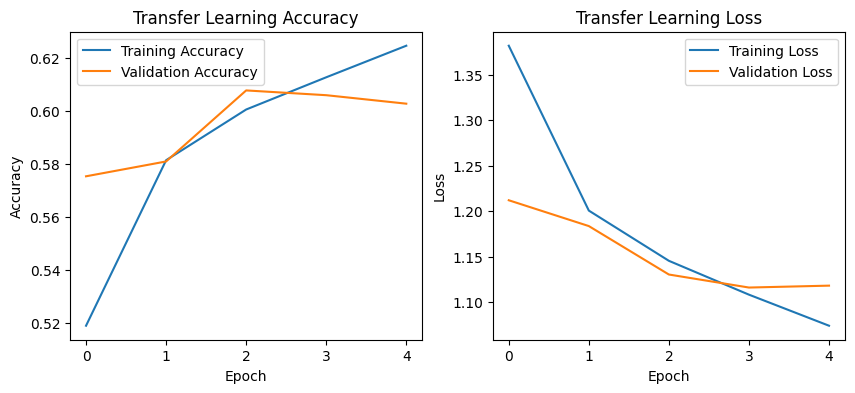

In [9]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model, layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 794s 563ms/step - accuracy: 0.5095 - loss: 1.4110 - val_accuracy: 0.6250 - val_loss: 1.0743
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 794s 558ms/step - accuracy: 0.6303 - loss: 1.0475 - val_accuracy: 0.6300 - val_loss: 1.0524
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 789s 548ms/step - accuracy: 0.6592 - loss: 0.9732 - val_accuracy: 0.6482 - val_loss: 0.9877
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 769s 547ms/step - accuracy: 0.6790 - loss: 0.9175 - val_accuracy: 0.6700 - val_loss: 0.9658
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 817s 558ms/step - accuracy: 0.6929 - loss: 0.8771 - val_accuracy: 0.6574 - val_loss: 0.9967


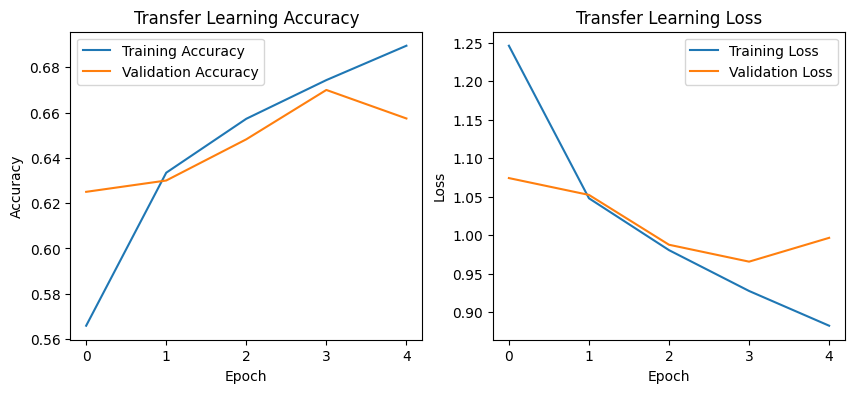

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = True

for layer in base_model.layers[:-2]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 449ms/step
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      1000
           1       0.76      0.74      0.75      1000
           2       0.50      0.64      0.56      1000
           3       0.46      0.47      0.47      1000
           4       0.63      0.55      0.59      1000
           5       0.57      0.59      0.58      1000
           6       0.65      0.74      0.69      1000
           7       0.75      0.68      0.71      1000
           8       0.83      0.71      0.77      1000
           9       0.83      0.58      0.68      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



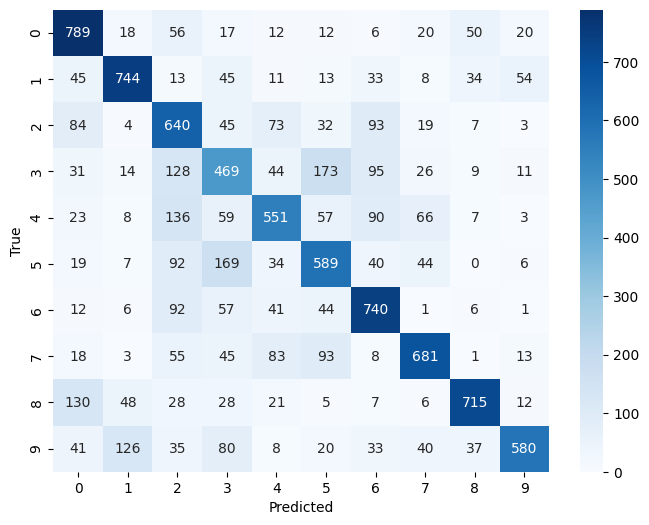

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# PENUGASAN

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9006 - loss: 0.3322 - val_accuracy: 0.9837 - val_loss: 0.0614
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.9855 - val_loss: 0.0596
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9886 - loss: 0.0370 - val_accuracy: 0.9883 - val_loss: 0.0471
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9858 - val_loss: 0.0496
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9880 - val_loss: 0.0503


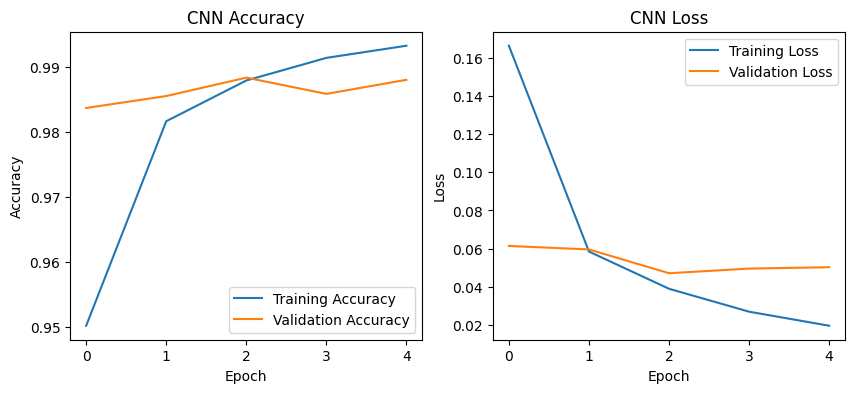

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# === Load dataset MNIST ===
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# === Preprocessing ===
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# === Build CNN ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Training ===
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# === Plot history ===
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [6]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====

import numpy as np
from PIL import Image, ImageOps
def preprocess_to_mnist_28x28(img_pil):
  """
  Langkah:
  - Konversi ke grayscale
   Auto  contrast
   (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
   Crop ke bounding box digit
   Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
   Normalisasi ke [0,1] dan tambah axis channel
   """
   # Grayscale + autocontrast
  img = img_pil.convert('L')
  img = ImageOps.autocontrast(img)
  arr = np.array(img).astype(np.uint8)
  # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
  if arr.mean() > 127:
    img = ImageOps.invert(img)
    arr = np.array(img)

  # Binarisasi ringan untuk cari bbox digit
  thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
  mask = arr > thr
  if mask.any():
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    img = img.crop((x0, y0, x1+1, y1+1))

  # Resize ke 20x20 dengan aspect ratio
  img.thumbnail((20, 20), Image.Resampling.LANCZOS)
  w, h = img.size

  # Pad ke 28x28 dan center
  canvas = Image.new('L', (28, 28), color=0)
  canvas.paste(img, ((28 - w)//2, (28 - h)//2))

  # Normalisasi ke [0,1]
  arr = np.array(canvas).astype('float32') / 255.0

  # Tambah channel dim (28,28,1)
  arr = arr[..., None]
  return canvas, arr

Saving 3.jpg to 3 (4).jpg
Saving 5.jpg to 5 (4).jpg
Saving 9.jpg to 9 (4).jpg


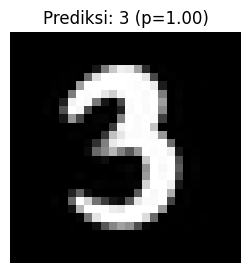

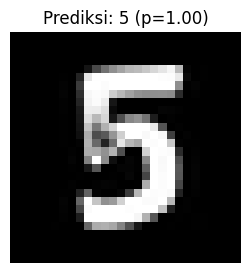

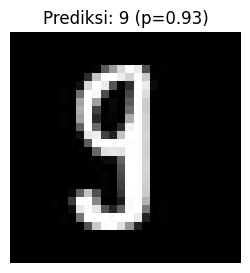

Rekap Prediksi (CNN):
- 3 (4).jpg -> 3 (p=1.000)
- 5 (4).jpg -> 5 (p=1.000)
- 9 (4).jpg -> 9 (p=0.927)


In [7]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)

    # Preprocess ke format MNIST
    disp, x = preprocess_to_mnist_28x28(img_pil)  # disp: PIL utk tampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)

    # Prediksi pakai model CNN yang udah dilatih
    probs = model.predict(x_batch, verbose=0)[0]  # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))
    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
